#### Using KNN for image classification on MNIST dataset

In [1]:
import numpy as np
from mnist import MNIST
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
mndata = MNIST('samples')
Xtrain, ytrain = mndata.load_training()
Xtest, ytest = mndata.load_testing()

In [14]:
print(("Train: {},{}, Test: {},{}").format(len(Xtrain), len(ytrain), len(Xtest), len(ytest)))

Train: 60000,60000, Test: 10000,10000


In [15]:
XtrainNew = np.stack(Xtrain)
XtestNew = np.stack(Xtest)

In [16]:
print(("train: {}, test: {}").format(XtrainNew.shape, XtestNew.shape))

train: (60000, 784), test: (10000, 784)


In [17]:
from scipy.spatial import distance

In [28]:
# def run_knn(Xtrain, Xtest, ytrain, ytest):
#     '''
#     We use knn algorithm to train the model and calculate the accuracy
#     '''
#     count = 0
#     result = []
#     for i in range(len(Xtest)):
#         x1 = Xtest[i]
#         dist = []
#         for x2 in Xtrain:
#             tempdist = distance.euclidean(x1,x2)
#             dist.append(tempdist)
#         dist = np.array(dist)
#         minIndex = np.argmin(dist)
#         result.append(ytrain[minIndex])
#         if ytrain[minIndex] == ytest[i]:
#             count += 1
    
#     return(count/float(len(ytest)))

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knnModel = KNeighborsClassifier(n_neighbors=5, n_jobs=4)

In [68]:
from time import time

In [69]:
starttime = time()
knnModel.fit(Xtrain, ytrain)
print(('time spent: {}s').format(time() - starttime))

time spent: 25.377601861953735s


In [70]:
starttime = time()
pred = knnModel.predict(Xtest)
print(('time spent: {}s').format(time() - starttime))

time spent: 220.70874500274658s


In [71]:
sum(pred == np.array(ytest))/float(len(ytest))

0.96879999999999999

In [72]:
residuleIndex = pred != np.array(ytest)

In [87]:
from itertools import compress
residuleList = list(compress(Xtest, residuleIndex))
predList = list(compress(pred, residuleIndex))
actualList = list(compress(ytest, residuleIndex))

In [103]:
def plotNumber(X):
    """
    input: pixels as a list
    """
    newarray = np.array(X).reshape(28,28)
    plt.imshow(newarray)

In [126]:
def plotRes(X, k=1):
    '''
    input piexels as a list, the number of nearest points
    
    this function will plot out the images which are near the given one
    '''
    dists = []
    for x in Xtrain:
        dists.append(distance.euclidean(x,X))
    dists = np.array(dists)
    wheremax = np.argsort(dists)
    for i in range(k):
        plt.subplot(1,k,i+1)
        plotNumber(Xtrain[wheremax[i]])

we predicted it as 0, the actual tag is 4


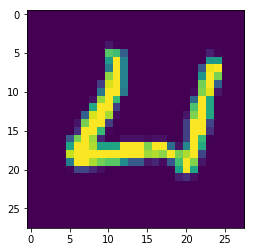

In [110]:
print(("we predicted it as {}, the actual tag is {}").format(predList[0], actualList[0]))
plotNumber(residuleList[0])

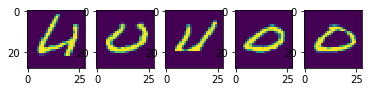

In [127]:
plotRes(residuleList[0], k=5)

we predicted it as 9, the actual tag is 4


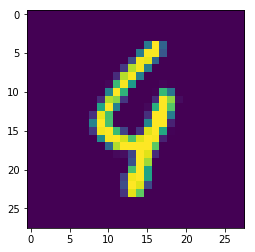

In [95]:
print(("we predicted it as {}, the actual tag is {}").format(predList[1], actualList[1]))
plotNumber(residuleList[1])

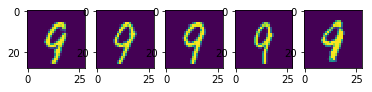

In [128]:
plotRes(residuleList[1], k=5)

we predicted it as 1, the actual tag is 3


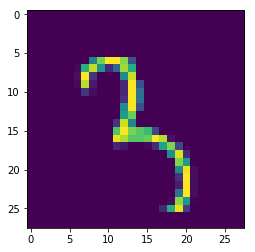

In [96]:
print(("we predicted it as {}, the actual tag is {}").format(predList[2], actualList[2]))
plotNumber(residuleList[2])

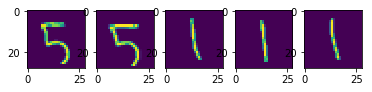

In [129]:
plotRes(residuleList[2], k=5)

we predicted it as 8, the actual tag is 9


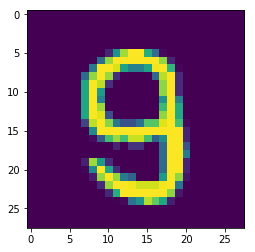

In [97]:
print(("we predicted it as {}, the actual tag is {}").format(predList[3], actualList[3]))
plotNumber(residuleList[3])

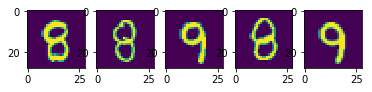

In [130]:
plotRes(residuleList[3], k=5)